In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#Uploading the dataser
df = pd.read_csv('mcdonalds.csv')

In [3]:
#printing first 10 entries of the dataframe
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [4]:
# extracting the column names
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
# Gathering more information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
# dimensions of the dataframe
df.shape

(1453, 15)

In [7]:
# replacing every entry corresponding to "Yes" with 1 and "No" with 0
for i in range(0,11):
    df = df.replace({df.columns[i]: {'Yes': 1,'No':0}})

In [8]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [9]:
#Extracting the relevant data information to process
y = df.iloc[:, 0:11]

In [10]:
y.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
5,1,1,0,1,0,1,1,1,0,0,0
6,1,1,1,1,0,1,0,1,1,1,0
7,1,1,0,1,1,1,1,1,0,0,0
8,0,0,0,1,1,0,0,0,1,0,1
9,1,1,0,1,1,1,0,1,1,0,0


In [11]:
y.shape

(1453, 11)

In [12]:
y.mean().round(2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [13]:
#applying PCA

pca = PCA(n_components = 11)

df_pca = pca.fit_transform(y)

In [14]:
#Making another dataframe containing the Principal Components
PCA = pd.DataFrame(data = df_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [15]:
# Gathering information such as std deviation and mean of the PC
PCA.describe().round(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
count,1453.00000,1453.00000,1453.00000,1453.00000,1453.00000,1453.00000,1453.00000,1453.00000,1453.00000,1453.00000,1453.00000
mean,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000
std,0.75705,0.60746,0.50462,0.39880,0.33741,0.31027,0.28970,0.27512,0.26525,0.24884,0.23690
min,-1.18842,-1.04027,-0.88081,-0.59062,-1.04594,-0.85249,-0.80595,-0.93162,-0.95576,-0.88720,-0.88514
25%,-0.54768,-0.35685,-0.45078,-0.28150,-0.24332,-0.19270,-0.13422,-0.17173,-0.11812,-0.14658,-0.10532
50%,-0.07075,-0.11516,0.02688,-0.11632,0.03349,-0.03460,-0.06366,-0.03476,0.03868,0.03021,-0.01201
75%,0.49330,0.39155,0.35159,0.27023,0.20483,0.17475,0.02318,0.12960,0.07988,0.07001,0.08554
max,1.70557,1.27913,1.32698,1.35528,1.05333,1.32379,1.35089,1.12139,1.08669,1.18152,0.92558


In [16]:
#proportion of variance
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

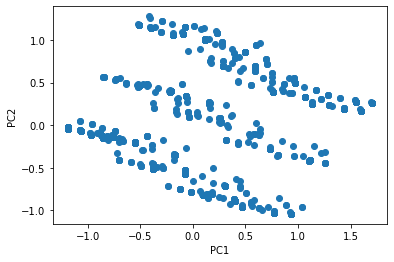

In [17]:
# Plotting the graph between PC1 and PC2
plt.scatter(PCA.iloc[:, 0:1], PCA.iloc[:, 1:2])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [18]:
# Gathering the first two PC's and using them for further clustering the dataset.
PC = PCA.iloc[:, 0:2]
PC_ = PC.to_numpy()

1367.9673022565794
753.6665766190994
434.73985417882847
224.35172544469646
181.99526471271355
145.06973933427807
114.79669681271656
94.4914995042446
75.39785779284992
63.65468885978942
52.13958788957041
43.89631313114842
37.89349660771665
34.07430155058161


Text(0, 0.5, 'WCSS')

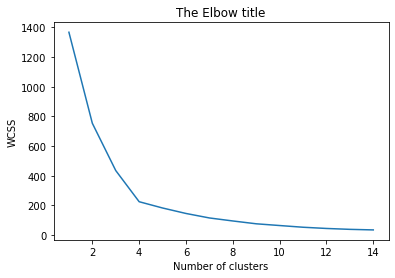

In [19]:
wcss=[]
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(PC_)
    wcss_iter = kmeans.inertia_
    print(wcss_iter)
    wcss.append(wcss_iter)

    
number_clusters = range(1,15)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Elbow method suggests to take 4 clusters


kmeans and kmeans++

In kmeans, the initial cluster centroids are taken at random and because of this we might not get the true result/clusters
after the max_iter is reached.
Kmeans++ helps in finding the centroid of the clusters in the smart way as to find the convergence early.


Steps in kmeans++:
1. Take one center c1, chosen uniformly at random from X .
2. Take a new center ci, choosing x ∈ X with probability proportional to D(x)^2
3. Repeat Step 2 until we have taken k centers altogether.
4. Proceed as with the standard k-means algorithm


D(x) denote the shortest distance from a data point to the closest center we have already chosen.

In [20]:

# Fitting K-Means to the dataset 
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(PC_)   #Compute cluster centers and predict cluster index for each sample.

y_kmeans


array([3, 1, 1, ..., 1, 0, 2])

In [21]:
# printing the cluster centres
kmeans.cluster_centers_   #cluster centres

array([[-0.74745544, -0.15889321],
       [ 0.00511425,  0.80533234],
       [ 1.24530894,  0.21335874],
       [ 0.39172283, -0.75465062]])

In [22]:
kmeans.labels_   # the new labels of each data point after applying kmeans

array([3, 1, 1, ..., 1, 0, 2])

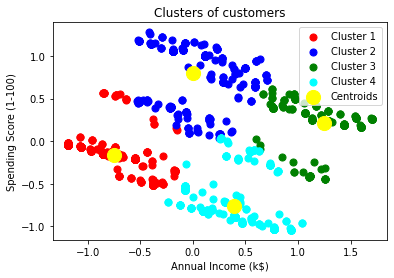

In [23]:
# Visualising the clusters (only for 2D clustering)
# plt.scatter: forms a scatter plot
# the first and second argument in plt.scatter is the x and y

plt.scatter(PC_[y_kmeans == 0, 0], PC_[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1') # plotting for cluster 1 and keeping the color to be red and sixe as 50 labelling as Cluster 1
plt.scatter(PC_[y_kmeans == 1, 0], PC_[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')# plotting for cluster 1 and keeping the color to be blue and sixe as 50 labelling as Cluster 2
plt.scatter(PC_[y_kmeans == 2, 0], PC_[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3') # plotting for cluster 1 and keeping the color to be green and sixe as 50 labelling as Cluster 3
plt.scatter(PC_[y_kmeans == 3, 0], PC_[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4') # plotting for cluster 1 and keeping the color to be cyan and sixe as 50 labelling as Cluster 4
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')# plotting for cluster centroids and keeping the color to be yellow and sixe as 200 labelling as centroids.

# fixing the title, label for x axis and y axis 

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()